# "Under the hood of a Neural Network"
> "Using the PyTorch MNIST dataset"

- toc: true
- branch: master
- comments: true
- author: Chelsea Tucker
- categories: [jupyter]

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mathschelsea/data_science/blob/main/notebooks/nn_underthehood.ipynb)

# 1. An Old Friend

## 1.0 Neural Network Definition

Let's define a (very) simple (3-layer) neural network:

In [ ]:
def simple_nn(x):
    linear1 = (x * w1) + b1
    ReLU = linear1.max(tensor(0.0))
    linear2 = (ReLU * w2) + b2
    return linear2

Now for those not familiar with Python code, or any code, this can look a little daunting. But bear with me here as it may not seem as bad after breaking it down. Let's go through each line.

## 1.1 Breaking it down

``def simple_nn(x):`` is stating that we're about to define a function *simple_nn* based on one variable *x*

``linear1 = (x * w1) + b1`` is defining a variable *linear1* whose value depends on the independent variable *x* and the parameters w1 (weight) and b1 (bias). Notice that this equation takes the form of our old friend, the equation for a straight line ``y=mx=c``.

``ReLU = linear1.max(tensor(0.0))`` is defining another new variable *ReLU* which takes the maximum value of either *linear1* or 0 i.e. when plotted ReLU looks like this:

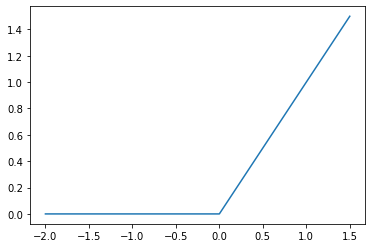

In [ ]:
# collapse_hide
import torch
from torch import tensor
import matplotlib.pyplot as plt

t = torch.arange(-2.0,2,0.5).float()
yt = t.max(tensor(0.))
plt.plot(t, yt);

``linear2 = (ReLU * w2) + b2`` is defining a final variable *linear2* whose values depends on *ReLU* and the parameters w2 (weight) and b2 (bias). Again, another equation for a straight line!

``return linear2`` does what it says on the tin, it returns the value(s) of the *linear2* function.

So, what does this mean? It means that the composition of a simple neural net is based one two very simple equations that most of us will have learnt in school. That is, the equation for a straight line:

``y = mx + c``

and the max function:

``f(x) = max(x,0)``

## Does it really work?

Some might say that such a simple set-up can't possible solve problems such as recognising dogs in images or distinuishing voices in a crowd. They'd be right in the sense that the above (very) simple definiton can't but if more layers (linear equations and max functions) were added then; yes, it can. In fact, it can solve any computable problem to a high level of accuracy with the right weights and biases. This is due to it's interesting setup of linear (linear equation) and nonlinear (max function) layers. 

But there's no need to take my word for it. We can see if it works...

# 2. MNIST Data

## 2.0 Importing the data

Pytorch has a number of very nice datasets that you can use for modelling. The one we'll use today to test our simple neural network is the MNIST dataset. It is a dataset of handwritten digits.

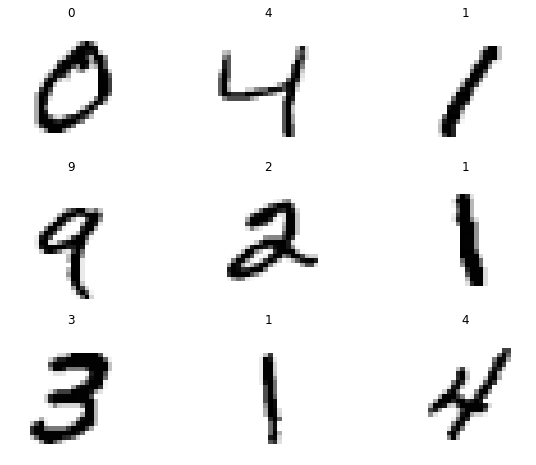

In [ ]:
# collapse_hide
from pathlib import Path
from torchvision import datasets

path = Path().cwd()/"Data"
ds_train = datasets.MNIST(path, train=True, download=True)
ds_valid = datasets.MNIST(path, train=False, download=True);

figure = plt.figure(figsize=(10,8))
r, c = 3, 3

for i in range(1,r*c+1):
    img, label = ds_train.data[i], ds_train.targets[i].item()
    figure.add_subplot(r, c, i)
    plt.title(label)
    plt.imshow(img, cmap="gray_r")
    plt.axis('off')
plt.show()

## 2.1 The Matrix

Now in true Matrix fashion, **everything** we see is made up of numbers. That is, each pixel has a number associated to it that is translated into a grayscale colour to make up the images we see above. To see the image in it's natural numerical form we just view it as a matrix. The images are 28 x 28 pixels so the matrix has 28 rows and 28 columns.

In [ ]:
# collapse_hide
import pandas as pd

im3 = ds_train.data[7]
df = pd.DataFrame(im3).astype(int)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0


## 2.2 Defining x

So now we have our images, how do we feed them into our simple neural network in order to train it to distinguish between handwritten digits?

# 3. Setting up the data

## 3.0 Transforming the images

As discussed, our handwritten digits can be viewed as images and as 28x28 matrices. They can also viewed as a vector i.e. lining the rows of the 28 x 28 matrix up one after the other to make a vector with 1 row and 784 columns.

Here is our image three again:

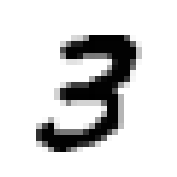

In [ ]:
# collapse_hide
figure = plt.figure(figsize=(3,3))
plt.imshow(im3, cmap="gray_r")
plt.axis('off');

And here is it's shape (a 28 x 28 matrix):

In [ ]:
print(im3.shape)

torch.Size([28, 28])


Here is our image three after it's been manipulated into a vector:

In [ ]:
# collapse_hide
vector3 = ds_train.data[3].view(-1,28*28)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(vector3, cmap="gray")
plt.axis('off');

And here is it's shape (note 28 x 28 = 784):

In [ ]:
print(vector3.shape)

torch.Size([1, 784])


## 3.1 Inputs for the NN

We're at a stage now where we can start defining some of the variables in our simple neural network:

In [ ]:
def simple_nn(x):
    linear1 = (x * w1) + b1
    ReLU = linear1.max(tensor(0.0))
    linear2 = (ReLU * w2) + b2
    return linear2

The *x* variable comprises of our images as vectors. For simplicity we'll just use 4 images of ones and 4 images of threes:

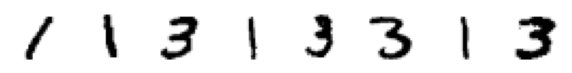

In [ ]:
# collapse_hide

list_1_3 = [3, 6, 7, 8, 10, 12, 14, 27]
n=1

for i in list_1_3:
    plt.subplot(1,len(list_1_3),n)
    plt.imshow(ds_train.data[i], cmap="gray_r")
    plt.axis('off')
    n = n + 1
plt.show()

So *x* is made up of 8 vectors representing images of ones and threes. This means *x* is a 8 x 784 matrix. Let's just check this:

In [ ]:
# collapse_hide
x = ds_train.data[list_1_3]/255
x = x.view(-1, 28*28)
print("x shape check:",x.shape)

x shape check: torch.Size([8, 784])


The weights, *w1* and bias *b1* are parameters that we don't know yet therefore we can set them to arbitary random numbers. The idea is that as we train our neural network, we'll update these weights and biases so that the loss function reduces and thus improves the accuracy of the model. 

Referring back to our training loop. The *x* variable is the input (i.e the images are the inputs). The parameters are our weights, *w1* and bias *b1* and the architecture is our simple neural network.

## 3.2 First run through

We've already defined our *x* variable as the 8 x 784 matrix. Let's now initalise a random set of parameters:

In [ ]:
w1 = torch.randn((784,1))
b1 = torch.randn(1)
w1.shape, b1.shape

(torch.Size([784, 1]), torch.Size([1]))

Putting this all together, we get our *linear1* function:

In [ ]:
def linear1(x): return x@w1 + b1

linear1(x)

tensor([[ -7.4666],
        [ -6.3561],
        [-17.4898],
        [ -4.0711],
        [-19.8116],
        [ -4.9169],
        [ -4.3286],
        [-15.3125]])

What the linear1 function has done is it's taken every pixel in an image and multiplied it's value by a weight and then added a bias. If the linear1 function's aim is to predict whether the image shows a number three, then the weights would ideally penalise pixels that follow a straight line pattern and reward pixels that take on curves, as an example. 

We can check how well this first linear equation is at predicting whether the handwritten digit on the image is a three by defining an accuracy function and comparing the *linear1* outputs to the actuals.

In [ ]:
# collapse_hide
# Defining the actuals
_y = ds_train.targets[list_1_3].unsqueeze(1)
y = _y == 3
y = y.float()

Here are the actuals:

In [ ]:
print(y)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


Here is our accuracy function:

In [ ]:
def accuracy(predictions, actuals):
    corrects = (predictions > 0.0).float() == actuals
    return corrects.float().mean().item()

Now let's see how well our *linear1* function is at distinguishing images of handwritten threes vs. handwritten ones:

In [ ]:
predictions = linear1(x)
actuals = y

accuracy(predictions, actuals)

0.5

A reasonable first attempt for a random set of weights and bias. The idea now is to improve on the parameters *w1* and *b1* so that this accuracy improves. The way this is done by defining a loss function and using Stochastic Gradient Descent (SGD). The loss function measures how well the model performs based on the current weights and biases. SGD is a type of optimisation that aims to tweeks the weights and biases so as to minimise the loss function. 

The introduction of the *ReLU* function and the *linear2* equations will improve the accuracy of the neural network even further. It will able to hone in on more features in the images and detect objects of increasing complexity, such as dogs. 

# 4. Training a Neural Network

## 4.0 Training and Validation datasets

In [ ]:
# collapse_hide
# Training data
# Pull out the 3s
filter_3 = ds_train.targets == 3
x_train_3, y_train_3 = ds_train.data[filter_3]/255, ds_train.targets[filter_3]

# Pull out the 7s
filter_7 = ds_train.targets == 7
x_train_7, y_train_7 = ds_train.data[filter_7]/255, ds_train.targets[filter_7]

# Concatenate the 3s and 7s and change them from a list of matrices to a list of vectors
x_train = torch.cat([x_train_3, x_train_7]).view(-1, 28*28)

# Concatenate the labels and use '1' for 3s and 0 for 7s.
y_train = torch.tensor([1]*len(y_train_3)+[0]*len(y_train_7)).unsqueeze(1)


# Validation data
# Pull out the 3s
filter_3 = ds_valid.targets == 3
x_valid_3, y_valid_3 = ds_valid.data[filter_3]/255, ds_valid.targets[filter_3]

# Pull out the 7s
filter_7 = ds_valid.targets == 7
x_valid_7, y_valid_7 = ds_valid.data[filter_7]/255, ds_valid.targets[filter_7]

# Concatenate the 3s and 7s and change them from a list of matrices to a list of vectors
x_valid = torch.cat([x_valid_3, x_valid_7]).view(-1, 28*28)

# Concatenate the labels and use '1' for 3s and 0 for 7s.
y_valid = torch.tensor([1]*len(y_valid_3)+[0]*len(y_valid_7)).unsqueeze(1)


In [ ]:
# Training Data
x_train.shape, y_train.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
# Validation Data
x_valid.shape, y_valid.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [ ]:
# Putting the data into DataLoaders
from torch.utils.data import DataLoader

training = zip(x_train, y_train)
training = list(training)

training = list(zip(x_train, y_train))
validation = list(zip(x_valid, y_valid))
dl_train = DataLoader(training, batch_size=256, shuffle=True)
dl_valid = DataLoader(validation, batch_size=256, shuffle=True)

In [ ]:
# Extract first batch from dataloader to check shapes
xb1, yb1 = next(iter(dl_train))
xb1.shape, yb1.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

## 4.1 Initialisation

In [ ]:
# Weights
w1 = torch.randn((784,30)).requires_grad_()
w2 = torch.randn((30,1)).requires_grad_()

# Biases
b1 = torch.randn(30).requires_grad_()
b2 = torch.randn(1).requires_grad_()

# Parameters
parameters = w1, w2, b1, b2

# Learning Rate
lr = 1.0

# Simple Neural Network
def simple_net(xb):
    linear1 = xb@w1 + b1
    ReLU = linear1.max(tensor(0.0))
    linear2 = ReLU@w2 + b2
    return linear2

## 4.2 Loss Function

In [ ]:
# Sigmoid Function
def sigmoid(x): return 1/(1+torch.exp(-x))

# Loss function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

## 4.3 Gradient Calculator

In [ ]:
# Function that calculates the gradient of the loss function with respect to the parameters
def calc_grad(xb, yb, model):
    predictions = simple_net(xb)
    loss = mnist_loss(predictions, yb)
    loss.backward()

## 4.4 Accuracy Function

In [ ]:
# Metric for measuring the accuray of the model on the validation dataset
def batch_accuracy(xb, yb):
    predictions = xb.sigmoid()
    correct = (predictions > 0.5) == yb
    return correct.float().mean()

## 4.5 Training & Validation functions

In [ ]:
# Final function that trains the model one epoch at a time
def train_epoch(model, lr, parameters):
    for xb, yb in dl_train:
        calc_grad(xb, yb, model)
        for p in parameters:
            p.data -= p.grad * lr
            p.grad.zero_()

In [ ]:
# Function that validates the trained model
def validate_epoch(model):
    accuracys = [batch_accuracy(model(xb), yb) for xb, yb in dl_valid]
    return round(torch.stack(accuracys).mean().item(), 4)

## 4.6 Training & Validating the model

In [ ]:
for i in range(10):
    train_epoch(simple_net, lr, parameters)
    print(validate_epoch(simple_net), end=' ')

0.9264 0.9568 0.9632 0.97 0.9691 0.975 0.9749 0.9749 0.976 0.977 

# 5. Testing a Neural Network

## 5.0 Importing my handwritten images

Normally we'd access the true accuracy of a model by pushing a test dataset through it. I still want to do this but I thought I'd have some fun and test the model's accuracy using my own handwritten images. In this section, I'll load some of my images and display them.

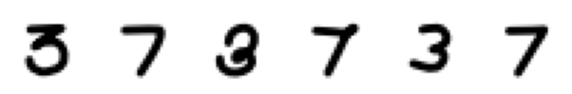

In [ ]:
# collapse_hide
from matplotlib import image

x_test = []
for i in range(6):
    test_im = image.imread("images/2021-12-05-underthehood"+str(i)+".jpg")
    x_test.append(test_im)

n=1
for i in range(6):
    plt.subplot(1,len(range(6)),n)
    plt.imshow(x_test[i][:,:,1], cmap="gray_r")
    plt.axis('off')
    n = n + 1
plt.show()

Let's see how well our simple Neural Network classes these handwritten figures:

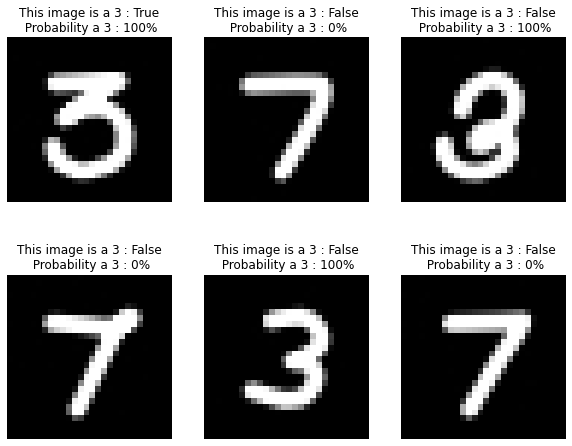

In [ ]:
# collapse_hide
figure = plt.figure(figsize=(10,8))
r, c = 2, 3

for i in range(r*c):
    test_array = x_test[i][:,:,1]
    test_tensor = tensor(test_array)
    test = test_tensor.view(-1, 28*28)/255
    pred = simple_net(test).sigmoid()
    correct = pred.item() == 1
    figure.add_subplot(r, c, i+1)
    plt.title("This image is a 3 : "+str(correct)+"\n Probability a 3 : "+"{:.0%}".format(pred.item()))
    plt.imshow(test_array, cmap="gray")
    plt.axis('off')
plt.show();